In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
p = pd.read_excel("./input/연령별인구현황_2020.xlsx", skiprows=4)
list = p.iloc[:, 4:6].sum(axis=1)
data = []
for i in range(len(p)):
    num = list.iloc[i].replace(",", "")
    data.append(int(num))
data[5] += data[7]
del data[7]
data

c:\Users\dawoo\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[14604111475106,
 430987419014,
 321534294310,
 401546406146,
 209375185867,
 216233555580,
 144569151705,
 18078481907459,
 180015166349,
 199209194677,
 243200268598,
 211464189012,
 200709186064,
 284163291117,
 378436399558,
 8274682555]

In [76]:
satisfied = pd.read_excel("./input/2020/근로_환경_만족도_2020.xlsx")
satisfied = satisfied.drop(columns="특성별(1)", axis=1)
satisfied = satisfied.set_index("특성별(2)")

satisfied_1 = satisfied.iloc[10:27, -4]
satisfied_2 = satisfied.iloc[10:27, -3]

total_list = []
for i in range(len(satisfied_1)):
    total = satisfied_1.iloc[i]+satisfied_2.iloc[i]
    total_list.append(total)
# 311 49
total_list[5]+=total_list[7]
del total_list[7]

# satisfied_1
# satisfied_2

print(total_list)

[14.9, 15.4, 19.3, 18.4, 17.1, 36.2, 16.8, 17.1, 17.6, 19.7, 16.8, 18.200000000000003, 16.599999999999998, 19.8, 17.8, 21.599999999999998]


In [83]:
local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
local_people = local_people.iloc[:, [0, -9, -8, -7]]
local_people = local_people.rename(
    columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
local_people = local_people.drop(index=0)
list = local_people.iloc[1:, 3]
new = []
for i in range(len(list)):
    num_str = list.iloc[i].replace(",", "")
    # print(num_str)
    new.append(int(num_str))
new

[7500,
 1851,
 1666,
 3525,
 205,
 1962,
 1894,
 11975,
 501,
 3179,
 3434,
 1016,
 650,
 715,
 8486,
 74]

In [78]:
# local_people_2020 = pd.read_excel("./output/지역별_퇴사자3.xlsx")
# local_people_2020 = local_people_2020.iloc[:, [0, -9, -8, -7]]
# local_people_2020 = local_people_2020.rename(
#     columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
# local_people_2020 = local_people_2020.drop(index=0)
# list_1 = local_people_2020.iloc[1:, 1]
# list_2 = local_people_2020.iloc[1:, 2]
# list_3 = local_people_2020.iloc[1:, 3]
# new_2020 = []
# for i in range(len(list_1)):
#     num_str_1 = list_1.iloc[i].replace(",", "")
#     num_str_2 = list_2.iloc[i].replace(",", "")
#     num_str_3 = list_3.iloc[i].replace(",", "")
#     # print(num_str)
#     new_2020.append((int(num_str_1)+int(num_str_2)+int(num_str_3))/data[i]*100)
# # new_2020
# # local_people_2020

# new_2020

[1.9197333605532824e-07,
 1.136460087676224e-06,
 1.8495694254829113e-06,
 2.9154787144934377e-06,
 8.296112038335731e-07,
 2.0463983899866464e-06,
 5.6146141166845275e-06,
 2.371161484655053e-07,
 1.110461990810534e-06,
 5.0042870843205035e-06,
 4.1455546320407765e-06,
 1.4650234701556001e-06,
 1.305371244525182e-06,
 1.2422434953241638e-06,
 8.432856891481165e-06,
 2.5982869864909278e-06]

In [79]:

df_not_satisfied = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new_2020})

correlation = df_not_satisfied["불만족"].corr(df_not_satisfied["신입_퇴사자"])
print(correlation)
df_not_satisfied

0.01605866253071251


,불만족,신입_퇴사자
0,14.9,1.919733e-07
1,15.4,1.136460e-06
2,19.3,1.849569e-06
3,18.4,2.915479e-06
4,17.1,8.296112e-07
5,36.2,2.046398e-06
6,16.8,5.614614e-06
7,17.1,2.371161e-07
8,17.6,1.110462e-06
9,19.7,5.004287e-06


In [80]:
# import statsmodels.api as sm
# mean = int(pd.Series(new).mean()+0.5)
# df_high = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new})
# df_high["퇴사율"] = (df_high["신입_퇴사자"] > mean).astype(int)
#
# X = df_high['불만족']
# X = sm.add_constant(X)
# Y = df_high['퇴사율']

# model = sm.OLS(Y, X).fit()

# print(model.summary())

<Axes: xlabel='불만족', ylabel='신입_퇴사자'>

c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


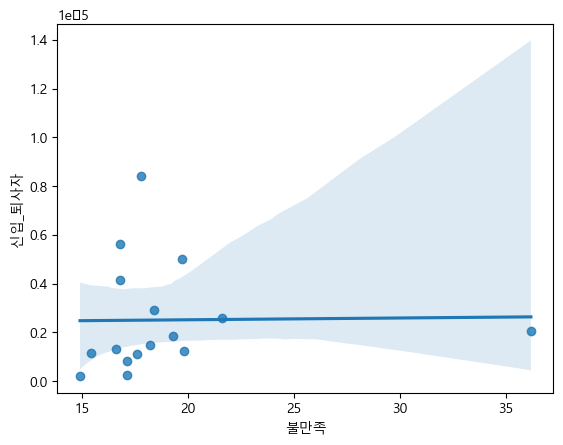

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_not_satisfied['불만족'], y=df_not_satisfied['신입_퇴사자'])

<Axes: >

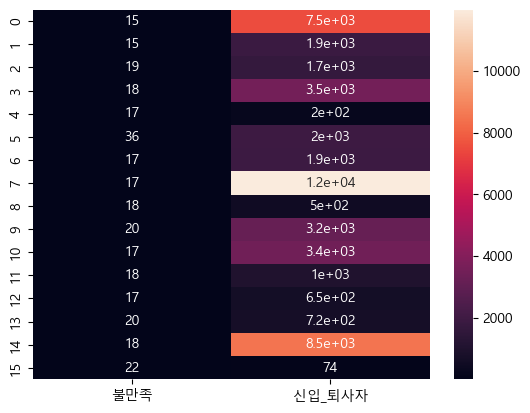

In [82]:
df = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new})
sns.heatmap(data=df, annot=True)